In [6]:
from scapy.all import *
from datetime import datetime
import csv

# Path to the pcap file
pcap_file = 'Training Data/nmap -O --osscan-guess 192.168.158.131(OS Scanning).pcap'

# Load packets from the pcap file
packets = rdpcap(pcap_file)

# Define a dictionary to store information for each (source IP, destination IP) combination
tcp_data = {}

# Iterate over each packet in the pcap file
for packet in packets:
    if TCP in packet:
        pkt_time = datetime.utcfromtimestamp(int(packet.time))
        src_ip = packet[IP].src
        dst_ip = packet[IP].dst
        src_port = packet[TCP].sport
        dst_port = packet[TCP].dport
        flags = packet[TCP].flags
        window = packet[TCP].window

        # Create a unique key for each (source IP, destination IP) combination
        key = (src_ip, dst_ip)

        # Initialize dictionary entry if not exists
        if key not in tcp_data:
            tcp_data[key] = {
                'src_ports': set(),
                'dst_ports': set(),
                'flags': {'F': 0, 'S': 0, 'R': 0, 'P': 0, 'A': 0, 'U': 0},
                'window_sum': 0,
                'count': 0,
                'last_time': pkt_time
            }

        # Update src and dest ports
        tcp_data[key]['src_ports'].add(src_port)
        tcp_data[key]['dst_ports'].add(dst_port)

        # Update flags count
        for flag in flags:
            if flag in tcp_data[key]['flags']:
                tcp_data[key]['flags'][flag] += 1
            else:
                # Unknown flag encountered, handle accordingly
                pass

        # Update window sum
        tcp_data[key]['window_sum'] += window

        # Update packet count and last packet time
        tcp_data[key]['count'] += 1
        tcp_data[key]['last_time'] = pkt_time

# Calculate average window size
for key in tcp_data:
    tcp_data[key]['avg_window'] = tcp_data[key]['window_sum'] / tcp_data[key]['count']

# Write TCP data to a CSV file
with open('tcp_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # Write headers
    writer.writerow(['Src_IP', 'Dst_IP', 'Src_Ports', 'Dst_Ports', 'F', 'S', 'R', 'P', 'A', 'U', 'Avg_Window'])
    # Write data
    for key in tcp_data:
        writer.writerow([
            key[0],  # Src_IP
            key[1],  # Dst_IP
            len(tcp_data[key]['src_ports']),  # Src_Ports
            len(tcp_data[key]['dst_ports']),  # Dst_Ports
            tcp_data[key]['flags']['F'],  # F
            tcp_data[key]['flags']['S'],  # S
            tcp_data[key]['flags']['R'],  # R
            tcp_data[key]['flags']['P'],  # P
            tcp_data[key]['flags']['A'],  # A
            tcp_data[key]['flags']['U'],  # U
            tcp_data[key]['avg_window']   # Avg_Window
        ])


c:\Users\jeffr\anaconda3\envs\IN6232\Lib\site-packages\scapy\libs\six.py:607: RuntimeWarning: coroutine 'Capture._get_tshark_process' was never awaited
  return iter(d.items(**kw))
C:\Users\jeffr\AppData\Local\Temp\ipykernel_30568\10611802.py:17: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  pkt_time = datetime.utcfromtimestamp(int(packet.time))


Shape of the dataset: (3220, 24)

Columns in the dataset: Index(['Packet_Type', 'Timestamp', 'Src_IP', 'Count', 'label', 'ID', 'QDCount',
       'ANCount', 'QD', 'TTL', 'QueryType', 'Dst_IP', 'Type', 'Code',
       'Payload_Length', 'Src_Ports', 'Dst_Ports', 'F', 'S', 'R', 'P', 'A',
       'U', 'Avg_Window'],
      dtype='object')

Data types of columns:
 Packet_Type        object
Timestamp          object
Src_IP             object
Count             float64
label              object
ID                float64
QDCount           float64
ANCount           float64
QD                 object
TTL               float64
QueryType         float64
Dst_IP             object
Type              float64
Code              float64
Payload_Length    float64
Src_Ports         float64
Dst_Ports         float64
F                 float64
S                 float64
R                 float64
P                 float64
A                 float64
U                 float64
Avg_Window        float64
dtype: object

Sum

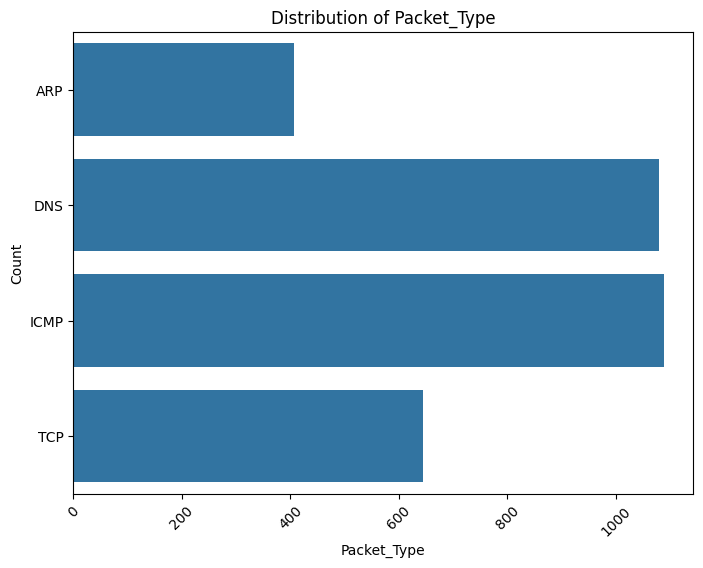

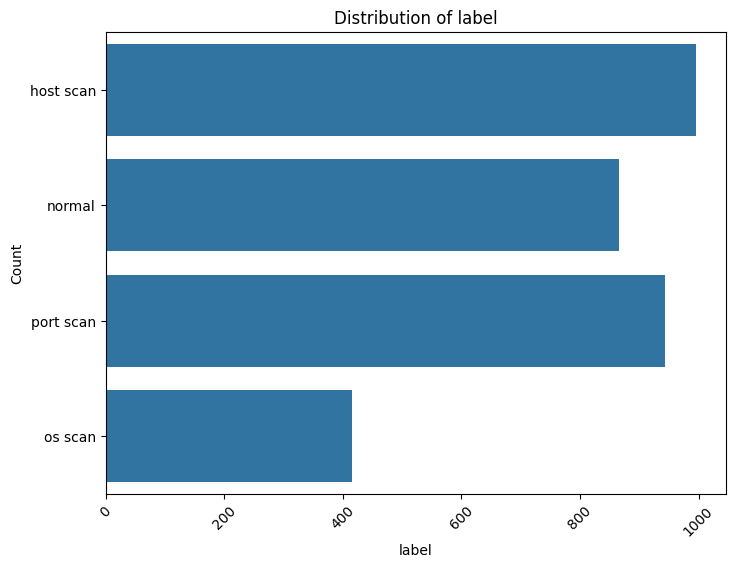

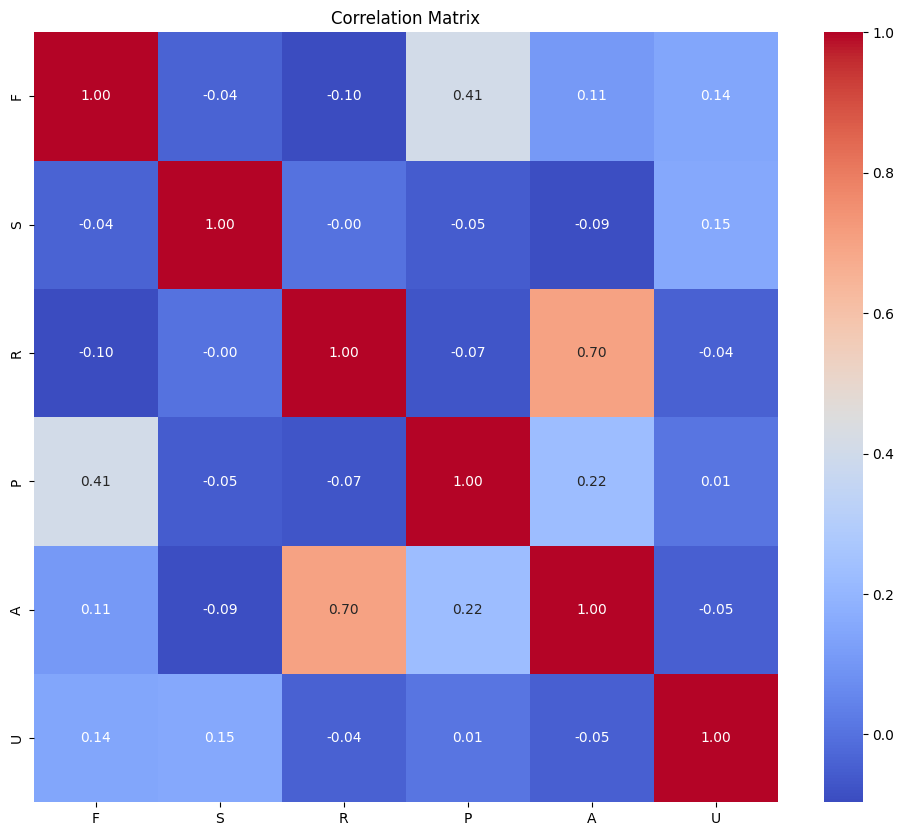

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("final_dataset.csv")  # Replace "your_dataset.csv" with the path to your dataset
data = data[:3220]
# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print("\nColumns in the dataset:", data.columns)
print("\nData types of columns:\n", data.dtypes)

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:\n", data.describe())

# Check for missing values
print("\nMissing values in the dataset:\n", data.isnull().sum())

# EDA for categorical variables
categorical_cols = ["Packet_Type", "label"]
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data[col])
    plt.title("Distribution of " + col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

numerical_cols = [
                  "F", "S", "R", "P", "A", "U"]
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


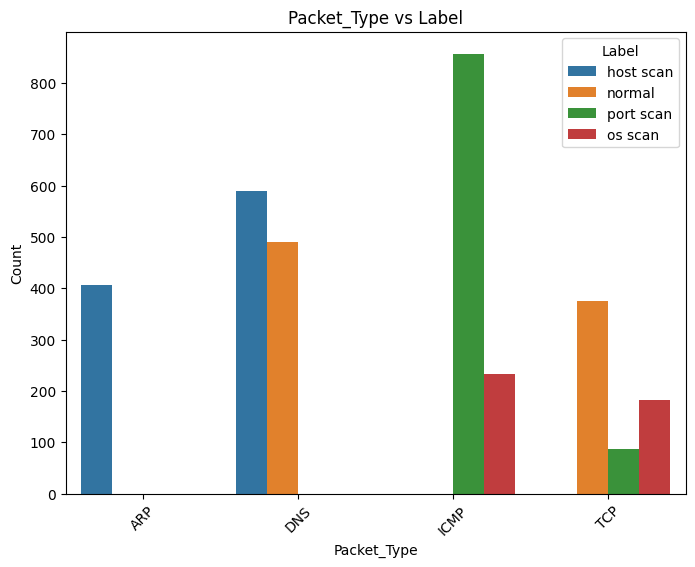

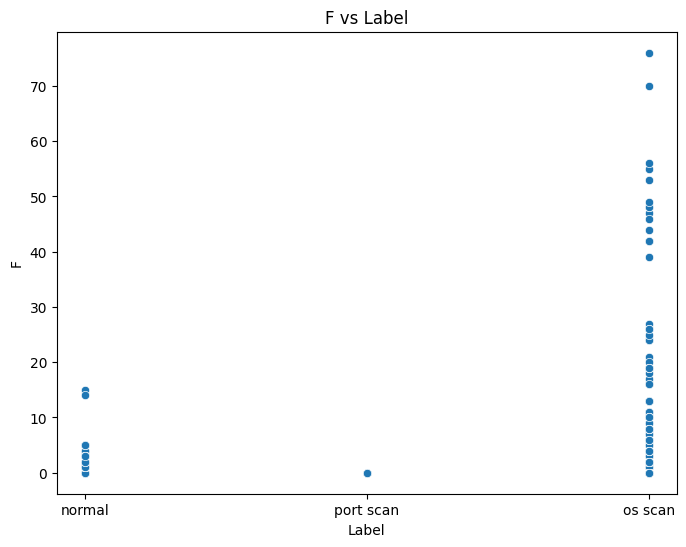

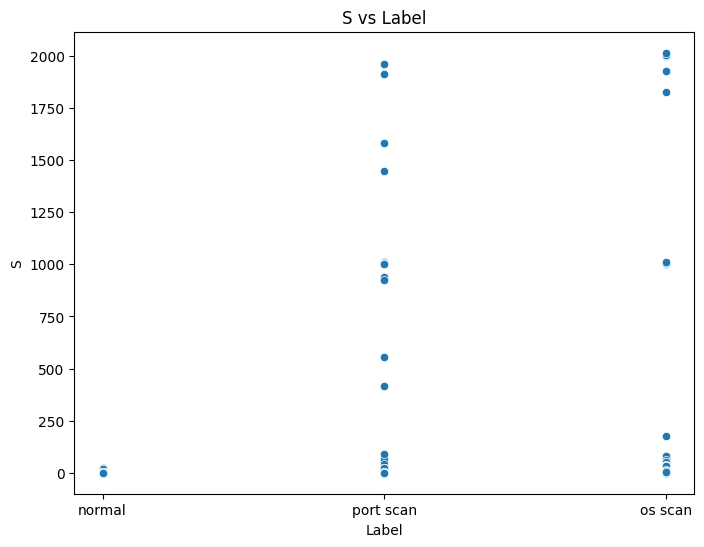

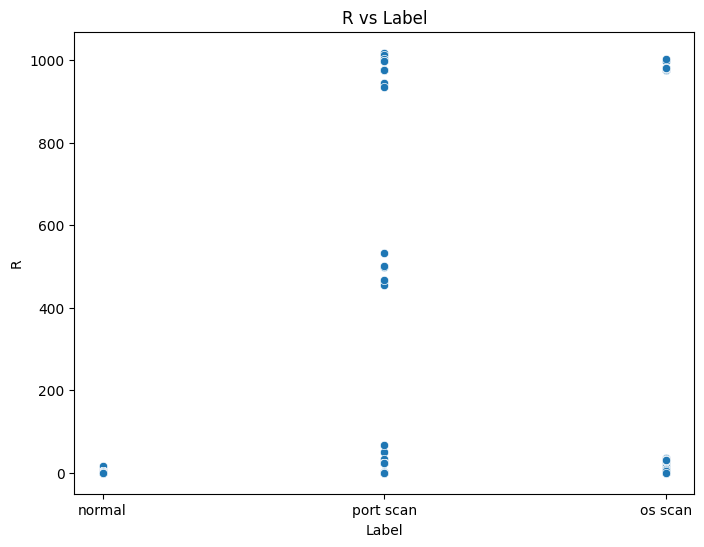

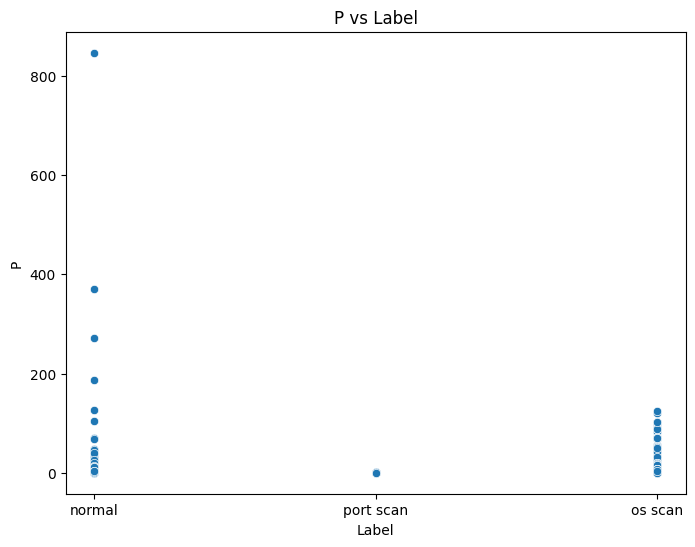

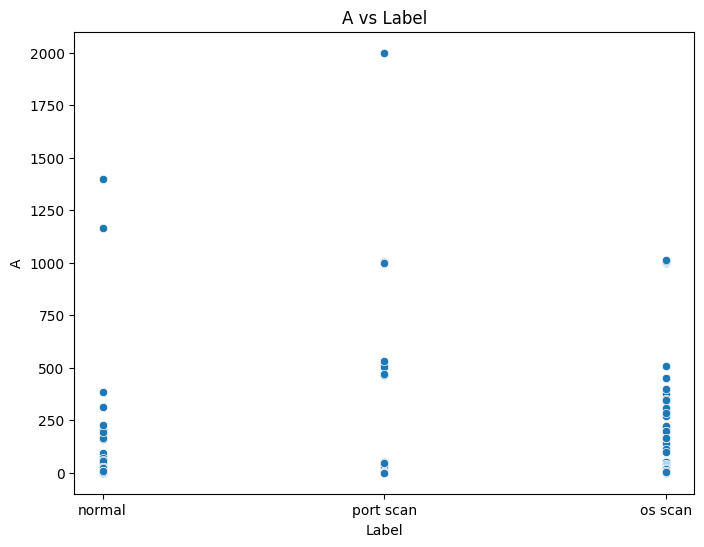

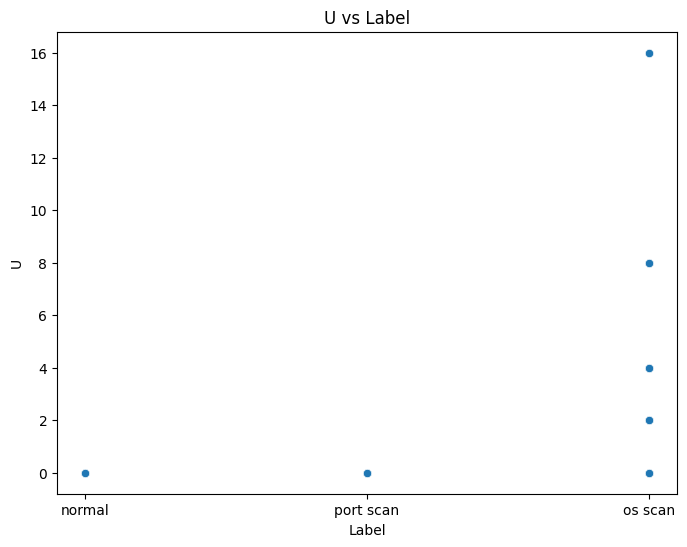

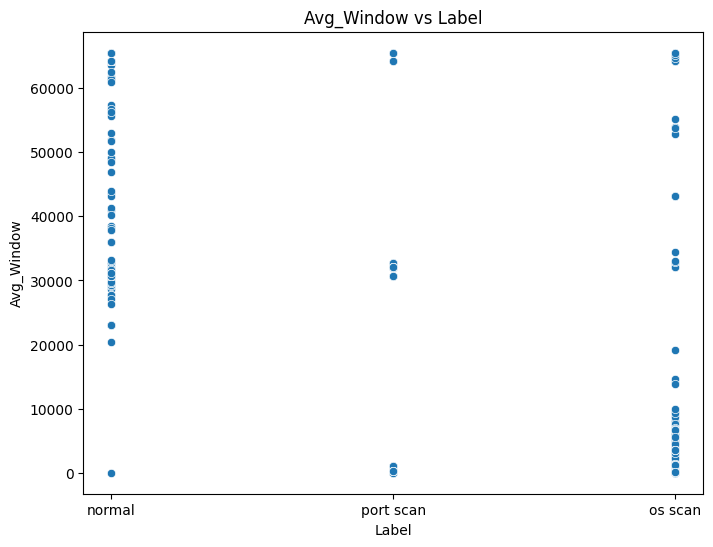

In [13]:
# List of columns except for the target variable (label)
columns = data.columns.drop(['Timestamp', 'Src_IP', 'Count', 'label', 'ID', 'QDCount',
       'ANCount', 'QD', 'TTL', 'QueryType', 'Dst_IP', 'Type', 'Code',
       'Payload_Length', 'Src_Ports', 'Dst_Ports'])

# Plot each column against the target variable (label)
for col in columns:
    plt.figure(figsize=(8, 6))
    if data[col].dtype == "object":
        # For categorical columns, plot count plot
        sns.countplot(x=col, hue="label", data=data)
        plt.title(f"{col} vs Label")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.legend(title="Label")
    else:
        # For numerical columns, plot box plot
        sns.scatterplot(x="label", y=col, data=data)
        plt.title(f"{col} vs Label")
        plt.xlabel("Label")
        plt.ylabel(col)
    plt.show()